In [91]:

import numpy as np

n=0
E =[]

A = np.array([[1,1,1,0,0],
              [0,1,1,1,0],
              [0,0,1,1,1],
              [0,0,1,1,0],
              [0,1,1,0,0]])

B = np.array([[1,0,1],
              [0,1,0],
              [1,0,1]])


for i in A:
    E.append(i[0:3])
    n+=1
    if n== 3:
        break
        
E=np.asarray(E)
D =(E*B).sum()

print(D)



print(A)
print('')

print(E)

4
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]

[[1 1 1]
 [0 1 1]
 [0 0 1]]


In [74]:
class DatatypeError:
    

AttributeError: type object 'filter' has no attribute 'shape'

In [1]:
import gdal
import osgeo
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os
import rasterio
import rasterio as rio
from rasterio import plot as rioplot

In [2]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open(infile) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

NameError: name 'infile' is not defined

In [7]:
infile = r"D:/Project/Pixel/LS8/LC08_L1TP_128050_20191108_20191108_01_RT.tar/LC08_L1TP_128050_20191108_20191108_01_RT/LC08_L1TP_128050_20191108_20191108_01_RT_B4.TIF"
outfile = r'D:/Project/Pixel/LS8/LC08_L1TP_128050_20191108_20191108_01_RT.tar/LC08_L1TP_128050_20191108_20191108_01_RT/LC08_L1TP_128050_20191108_20191108_01_RT_B4_{}.TIF'
coordinates = (
    (100.23840, 15.49752) , # lon, lat of ~centre of Australia
    (103.39115, 13.40327) , # lon, lat of ~centre of Tasmania
)

# Your NxN window
N = 3

# Open the raster
with rio.open(infile) as dataset:

    # Loop through your list of coords
    for i, (lon, lat) in enumerate(coordinates):

        # Get pixel coordinates from map coordinates
        py, px = dataset.index(lon, lat)
        print('Pixel Y, X coords: {}, {}'.format(py, px))

        # Build an NxN window
        window = rio.windows.Window(px - N//2, py - N//2, N, N)
        print(window)

        # Read the data in the window
        # clip is a nbands * N * N numpy array
        clip = dataset.read(window=window)

        # You can then write out a new file
        meta = dataset.meta
        meta['width'], meta['height'] = N, N
        meta['transform'] = rio.windows.transform(window, dataset.transform)

        with rio.open(outfile.format(i), 'w', **meta) as dst:
            dst.write(clip)

Pixel Y, X coords: 57229, -3207
Window(col_off=-3208, row_off=57228, width=3, height=3)
Pixel Y, X coords: 57230, -3207
Window(col_off=-3208, row_off=57229, width=3, height=3)


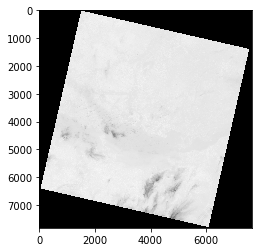

LC08_L1TP_128050_20191108_20191108_01_RT_B10.TIF


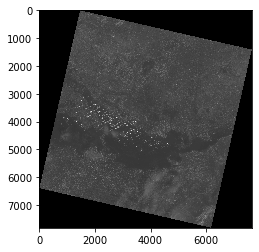

LC08_L1TP_128050_20191108_20191108_01_RT_B4.TIF


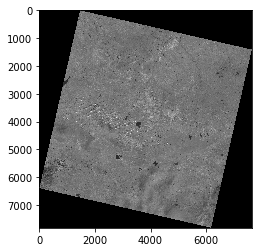

LC08_L1TP_128050_20191108_20191108_01_RT_B5.TIF


In [2]:
Local = "D:/Project/Pixel/LS8/"

seq = os.listdir(Local)
w=1

for i in seq:
    j = os.listdir(Local+i)
    for k in j:
        m = os.listdir(Local+i+'/'+k)
        for n in m:
            if 'B4.TIF' in n:
                b4 = rio.open(Local+i+'/'+k+'/'+n)
                b4 = (b4.read(1))
                
                rio.plot.show((b4), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
                plt.show()
                print(n)
                #print(type(a))
                #b = a.profile
                #print(b)
                #c = b['transform']
                #print(c)
            if 'B5.TIF' in n:
                b5 = rio.open(Local+i+'/'+k+'/'+n)
                b5 = (b5.read(1))
              
                rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
                plt.show()
                print(n)
                
            if 'B10.TIF' in n:
                b10 = rio.open(Local+i+'/'+k+'/'+n)
                b10 = (b10.read(1))
              
                rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
                plt.show()
                print(n)                

               
            
        


[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]
(7821, 7651)
132.84267098601623
251.8404465367552


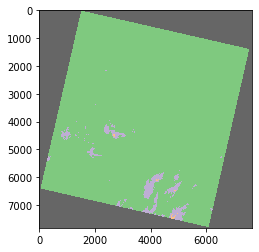

In [9]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) 
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-40, np.nan, LST)
print(LST.shape)          

print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
#rasterio.plot.show_hist(LST,title='Histrogram of Land surface temperature 08 Nov 2019')
plt.show()

In [10]:
print(np.nanmin(ndvi))
print(np.nanmin(BT))

0
132.70106227013315


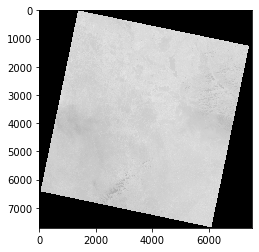

LC08_L1TP_129050_20191115_20191115_01_RT_B10.TIF


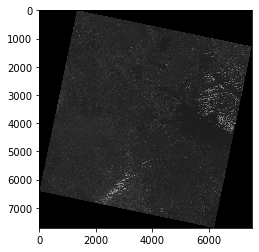

LC08_L1TP_129050_20191115_20191115_01_RT_B4.TIF


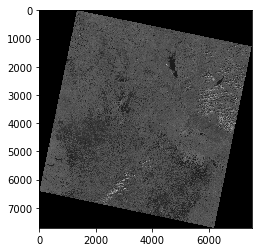

LC08_L1TP_129050_20191115_20191115_01_RT_B5.TIF


In [26]:
path = 'D:/Project/LC08_L1TP_129050_20191115_20191115_01_RT.tar/LC08_L1TP_129050_20191115_20191115_01_RT/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]
2.0372604902595843
35.85175667809114


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7711, 7551)
37.85667752692508
47.7975932649666


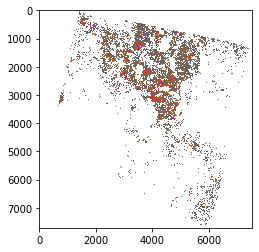

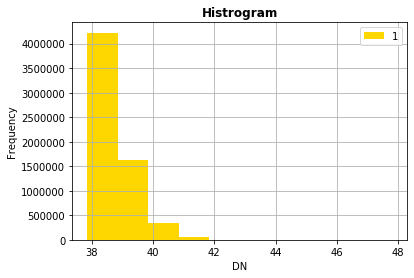

In [27]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 65.84739272
print(np.nanstd(LST))
print(np.nanmean(LST))

UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape)          

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((UHI), cmap='Accent_r')
rasterio.plot.show_hist(UHI,title='Histrogram')
plt.show()


In [28]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(578085,1.71422e+06 , 30, 30)
new_dataset = rasterio.open('Edit_Surface_Temp_129050_20191115', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

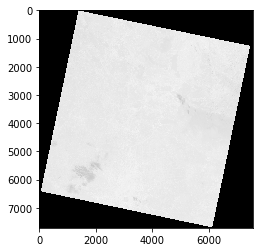

LC08_L1TP_129050_20151104_20170402_01_T1_B10.TIF


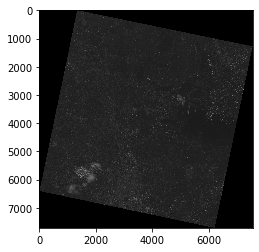

LC08_L1TP_129050_20151104_20170402_01_T1_B4.TIF


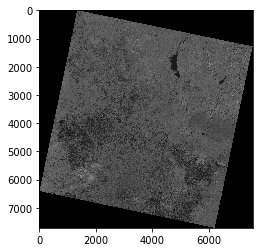

LC08_L1TP_129050_20151104_20170402_01_T1_B5.TIF


In [2]:
path = 'D:/Project/2015-11-04/LC08_L1TP_129050_20151104_20170402_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


(7711, 7561)
36.31662637039944
43.21553018960806


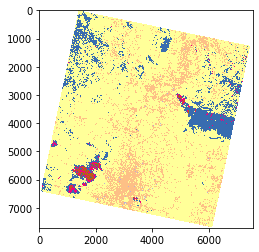

C:\Users\Kittiphong\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kittiphong\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


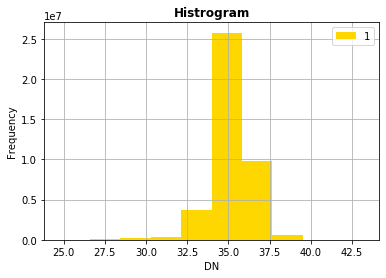

In [3]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 65.74739272
UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()

In [4]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(578085,1.71422e+06 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_129050_20151104.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

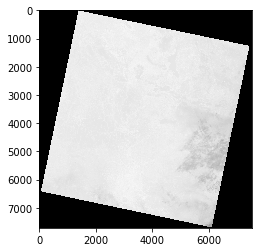

LC08_L1TP_129050_20171125_20171206_01_T1_B10.TIF


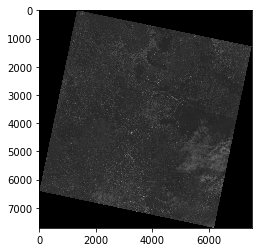

LC08_L1TP_129050_20171125_20171206_01_T1_B4.TIF


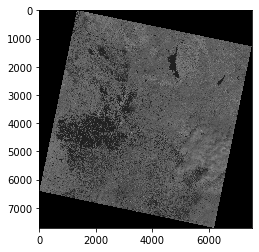

LC08_L1TP_129050_20171125_20171206_01_T1_B5.TIF


In [5]:
path = "D:\Project\LC08_L1TP_129050_20171125_20171206_01_T1.tar\LC08_L1TP_129050_20171125_20171206_01_T1/"
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
        

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


(7711, 7551)
7.7840399620969976
37.66947985258889


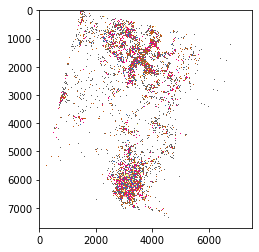

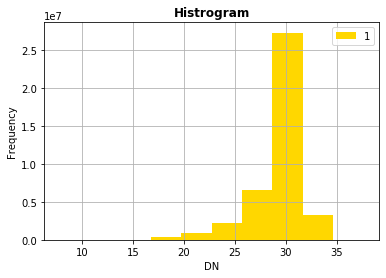

In [6]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 61.1645308
UHI = np.where(LST<24,np.nan,(LST))
UHI = np.where(UHI>35,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 

print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((UHI), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [7]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(578085,1.71422e+06 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_129050_20171125.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

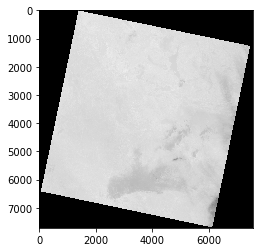

LC08_L1TP_129050_20161224_20170315_01_T1_B10.TIF


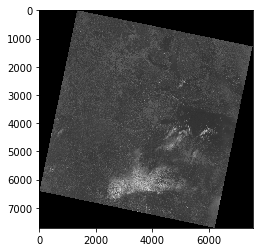

LC08_L1TP_129050_20161224_20170315_01_T1_B4.TIF


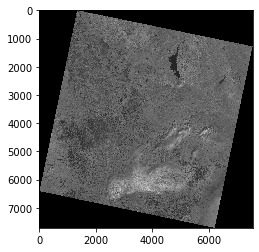

LC08_L1TP_129050_20161224_20170315_01_T1_B5.TIF


In [21]:
path = 'D:/Project/LC08_L1TP_129050_20161224_20170315_01_T1.tar/LC08_L1TP_129050_20161224_20170315_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7711, 7561)
4.7169143953676596
44.69990868418615


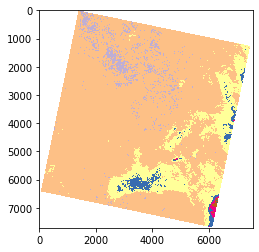

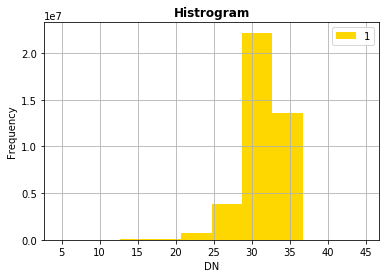

In [22]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 62.93986178
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [23]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(578085,1.71422e+06 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_129050_20161224.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

<class 'osgeo.gdal.Dataset'>


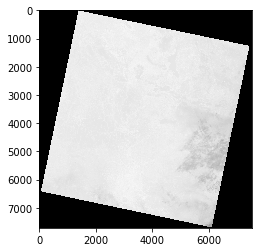

LC08_L1TP_129050_20171125_20171206_01_T1_B10.TIF


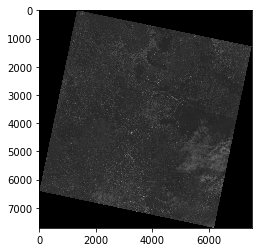

LC08_L1TP_129050_20171125_20171206_01_T1_B4.TIF


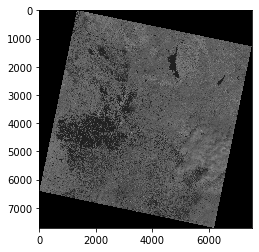

LC08_L1TP_129050_20171125_20171206_01_T1_B5.TIF


In [26]:
path = "D:\Project\LC08_L1TP_129050_20171125_20171206_01_T1.tar\LC08_L1TP_129050_20171125_20171206_01_T1/"
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = gdal.Open(path+n)
        b4 = (b4.ReadAsArray())
                
        plt.imshow((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = gdal.Open(path+n)
        b5 = (b5.ReadAsArray())
              
        plt.imshow((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = gdal.Open(path+n)
        print(type(b10))
        b10 = (b10.ReadAsArray())
              
        plt.imshow((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
        

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less


(7711, 7551)
-140.40500763638397
16.459255266933894


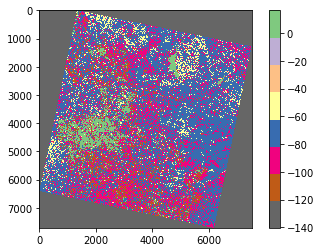

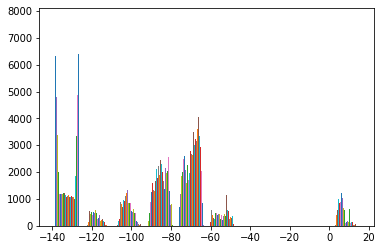

In [44]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789
Lmax = 22.00180
Lmin = 0.10033

ndvi = b5 - b4
L = Lmin + (Lmax - Lmin) * (ndvi - np.nanmin(ndvi))/(np.nanmax(ndvi)-np.nanmin(ndvi))

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4

#LST = np.where(LST<, np.nan, LST)
LST = np.where(LST> 45, np.nan, LST)
#LST = np.where(LST< 15 , np.nan, LST)
UHI = np.where(LST<24,np.nan,(LST))
UHI = np.where(UHI>35,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 

print(np.nanmin(BT))
print(np.nanmax(BT))

plt.imshow((BT), cmap='Accent_r')
plt.colorbar()
plt.show()
plt.hist(BT)
plt.show()



129049 20171125

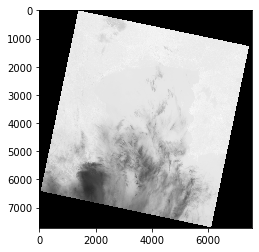

LC08_L1TP_129051_20151104_20170402_01_T1_B10.TIF


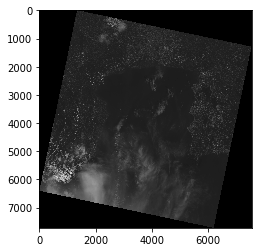

LC08_L1TP_129051_20151104_20170402_01_T1_B4.TIF


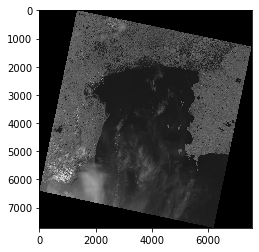

LC08_L1TP_129051_20151104_20170402_01_T1_B5.TIF


In [29]:
path = 'D:/Project/New Map/LC08_L1TP_129051_20151104_20170402_01_T1.tar/LC08_L1TP_129051_20151104_20170402_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7721, 7561)
-24.069042099517276
42.571526279902315


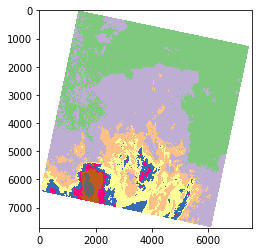

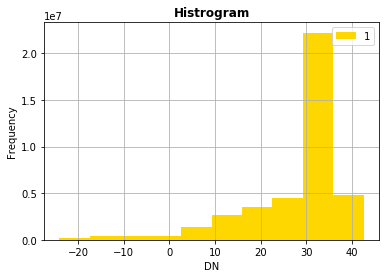

In [30]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 65.74739272
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [31]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(543900.29,1554300.33 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_129051_20151104.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

129049 20171125

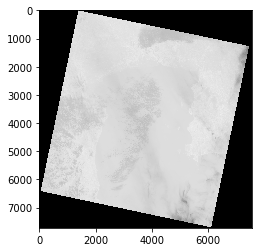

LC08_L1TP_129051_20161224_20170315_01_T1_B10.TIF


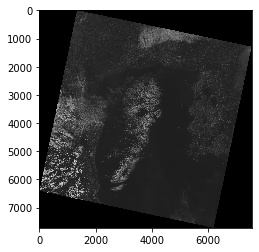

LC08_L1TP_129051_20161224_20170315_01_T1_B4.TIF


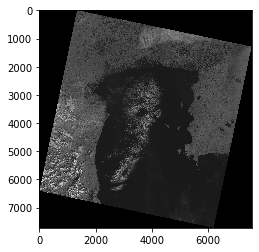

LC08_L1TP_129051_20161224_20170315_01_T1_B5.TIF


In [32]:
path = 'D:/Project/New Map/LC08_L1TP_129051_20161224_20170315_01_T1.tar/LC08_L1TP_129051_20161224_20170315_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7721, 7561)
4.719504510567468
43.32488601745209


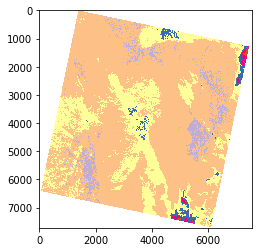

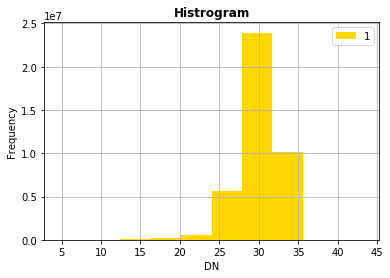

In [33]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 62.93986178
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [35]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(543900.29,1554300.33 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_129051_20161224.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

128049 20181227

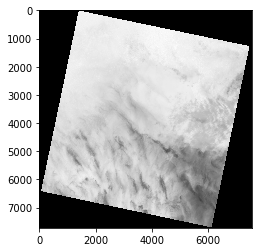

LC08_L1TP_129051_20171125_20171206_01_T1_B10.TIF


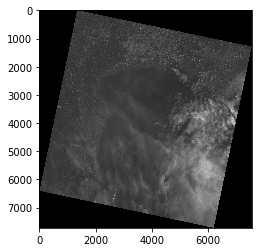

LC08_L1TP_129051_20171125_20171206_01_T1_B4.TIF


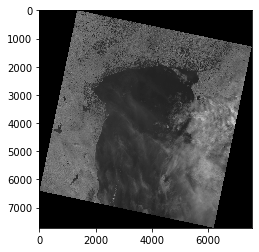

LC08_L1TP_129051_20171125_20171206_01_T1_B5.TIF


In [36]:
path = 'D:/Project/New Map/LC08_L1TP_129051_20171125_20171206_01_T1.tar\LC08_L1TP_129051_20171125_20171206_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7721, 7561)
-21.138236531319585
35.68930766289803


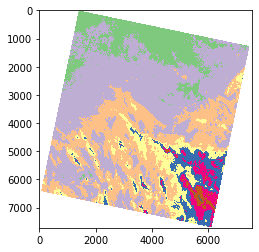

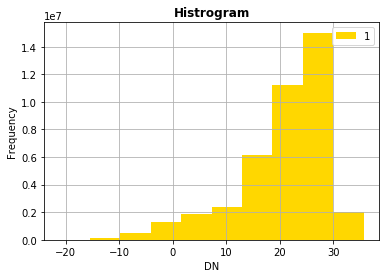

In [37]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 61.1645308
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [38]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(543900.29,1554300.33 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_129051_20171125.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

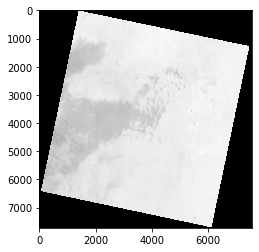

LC08_L1TP_129051_20181214_20181227_01_T1_B10.TIF


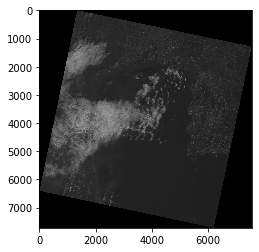

LC08_L1TP_129051_20181214_20181227_01_T1_B4.TIF


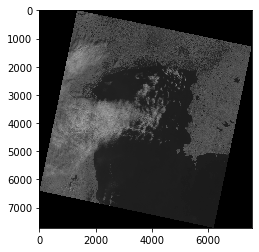

LC08_L1TP_129051_20181214_20181227_01_T1_B5.TIF


In [39]:
path = 'D:/Project/New Map/LC08_L1TP_129051_20181214_20181227_01_T1.tar\LC08_L1TP_129051_20181214_20181227_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7721, 7561)
11.02853885331023
33.81841463546948


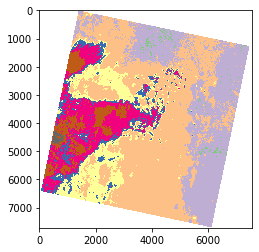

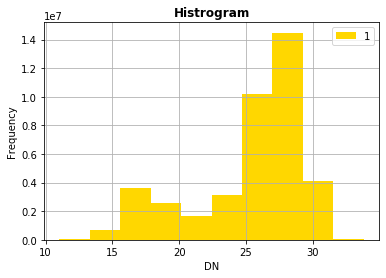

In [40]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 63.03329449 
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [41]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(543900.29,1554300.33 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_129051_20181214.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

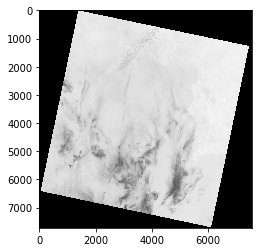

LC08_L1TP_129051_20191115_20191115_01_RT_B10.TIF


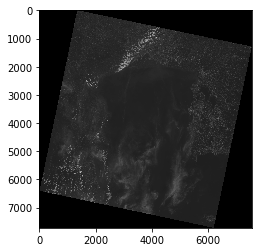

LC08_L1TP_129051_20191115_20191115_01_RT_B4.TIF


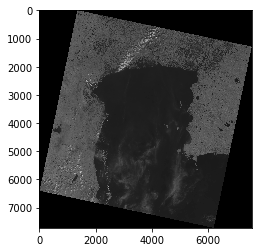

LC08_L1TP_129051_20191115_20191115_01_RT_B5.TIF


In [42]:
path = 'D:/Project/New Map/LC08_L1TP_129051_20191115_20191115_01_RT.tar\LC08_L1TP_129051_20191115_20191115_01_RT/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7721, 7561)
-8.117830242814748
43.14082143590624


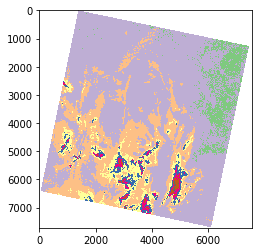

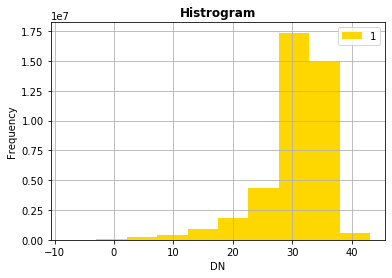

In [46]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 65.84739272
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [48]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(545099.79,1554300.22 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_129051_20191115.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

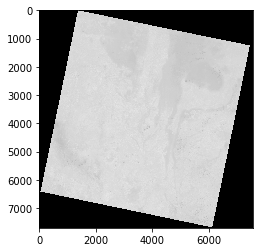

LC08_L1TP_129049_20191115_20191115_01_RT_B10.TIF


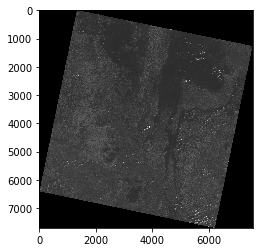

LC08_L1TP_129049_20191115_20191115_01_RT_B4.TIF


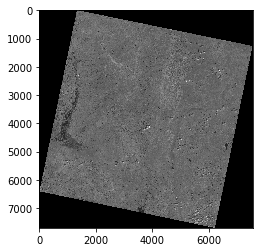

LC08_L1TP_129049_20191115_20191115_01_RT_B5.TIF


In [24]:
path = 'D:/Project/New Map/LC08_L1TP_129049_20191115_20191115_01_RT.tar/LC08_L1TP_129049_20191115_20191115_01_RT/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7721, 7561)
-8.117830242814748
43.14082143590624


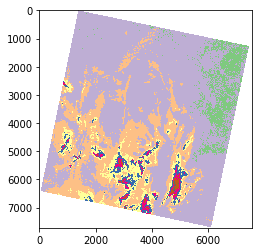

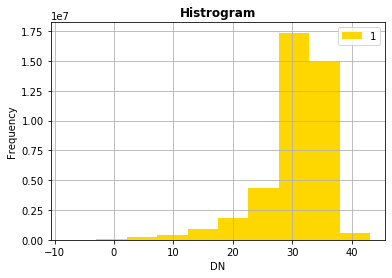

In [43]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 65.84739272
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [17]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(611999.48,1874100.05 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_129049_20191115.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47Q +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

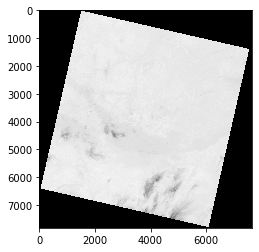

LC08_L1TP_128050_20191108_20191115_01_T1_B10.TIF


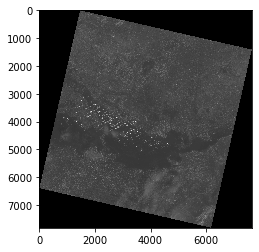

LC08_L1TP_128050_20191108_20191115_01_T1_B4.TIF


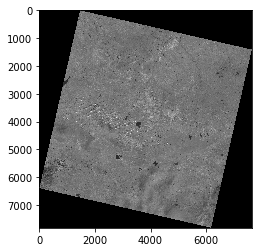

LC08_L1TP_128050_20191108_20191115_01_T1_B5.TIF


In [18]:
path = 'D:/Project/New Map/LC08_L1TP_128050_20191108_20191115_01_T1.tar/LC08_L1TP_128050_20191108_20191115_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7821, 7651)
-44.99915130179271
-22.012387791252298


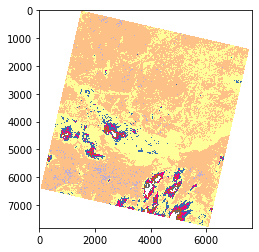

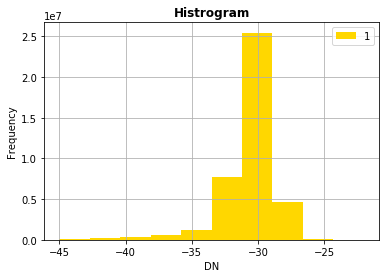

In [23]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-45, np.nan, LST) 
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [24]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(740132.01,1714608.92 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_128050_20191108.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47Q +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

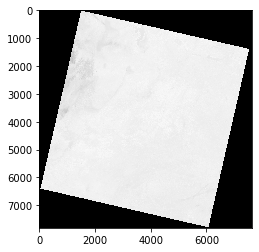

LC08_L1TP_128049_20191108_20191115_01_T1_B10.TIF


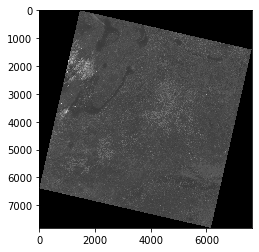

LC08_L1TP_128049_20191108_20191115_01_T1_B4.TIF


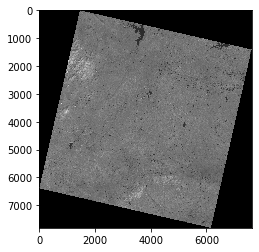

LC08_L1TP_128049_20191108_20191115_01_T1_B5.TIF


In [25]:
path = 'D:/Project/New Map/LC08_L1TP_128049_20191108_20191115_01_T1.tar/LC08_L1TP_128049_20191108_20191115_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7811, 7651)
-44.37075033877961
-23.630144854971366


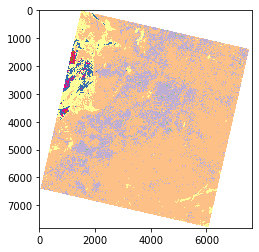

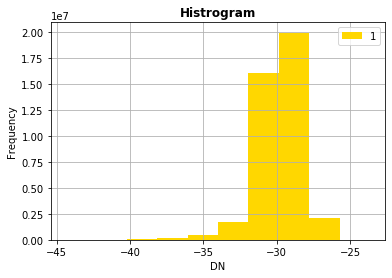

In [26]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) 
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [27]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(772021.12,1874748.05 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_128049_20191108.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47Q +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

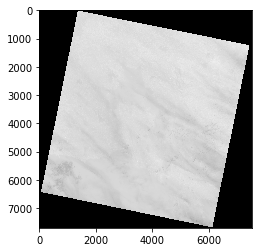

LC08_L1TP_128051_20181223_20181227_01_T1_B10.TIF


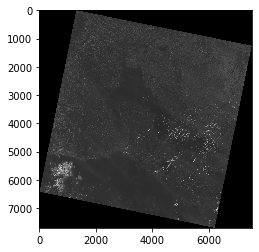

LC08_L1TP_128051_20181223_20181227_01_T1_B4.TIF


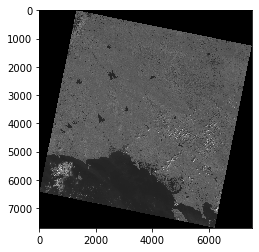

LC08_L1TP_128051_20181223_20181227_01_T1_B5.TIF


In [28]:
path = 'D:/Project/New Map/LC08_L1TP_128051_20181223_20181227_01_T1.tar/LC08_L1TP_128051_20181223_20181227_01_T1/'
for n in os.listdir(path):
    if 'B4.TIF' in n:
        b4 = rio.open(path+n)
        b4 = (b4.read(1))
                
        rio.plot.show((b4), cmap='Greys_r')
                
        plt.show()
        print(n)
    if 'B5.TIF' in n:
        b5 = rio.open(path+n)
        b5 = (b5.read(1))
              
        rio.plot.show((b5), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)
                
    if 'B10.TIF' in n:
        b10 = rio.open(path+n)
        b10 = (b10.read(1))
              
        rio.plot.show((b10), cmap='Greys_r')
                #rio.plot.show((a), contour=True, ax=ax)
        plt.show()
        print(n)                

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


(7701, 7541)
-44.601939633648215
-17.352709629165265


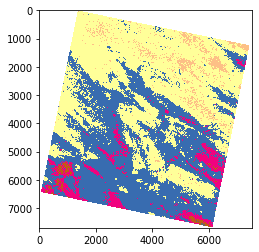

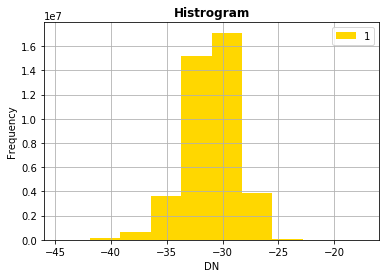

In [29]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15



Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε)))) 
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) 
UHI = np.where(LST<-40,np.nan,(LST))
UHI = np.where(UHI>-26,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 


print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((LST), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



In [ ]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(772021.12,1874748.05 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_128049_20191108.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47Q +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

[[0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 ...
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]
 [0.986 0.986 0.986 ... 0.986 0.986 0.986]]


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


(7711, 7551)
18.38080931770086
44.33902602617067


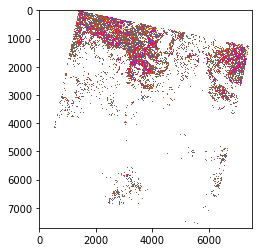

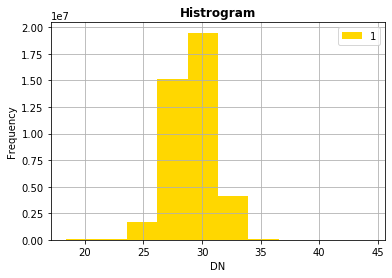

In [33]:
ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 63.03329449
UHI = np.where(LST<24,np.nan,(LST))
UHI = np.where(UHI>35,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape) 

print(np.nanmin(LST))
print(np.nanmax(LST))

rio.plot.show((UHI), cmap='Accent_r')
rasterio.plot.show_hist(LST,title='Histrogram')
plt.show()



print(np.nanmin(UHI))
print(np.nanmax(UHI))

In [35]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(578085,1.71422e+06 , 30, 30)

new_dataset = rasterio.open('UHI2018.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(UHI, 1)
new_dataset.close()